In [60]:
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler,PolynomialFeatures


In [61]:
df = pd.read_csv('train.csv')

In [62]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [64]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [65]:
df.drop(columns=['Id'], inplace=True)

In [66]:
df.rename(columns={'BedroomAbvGr':'Bedroom', 'KitchenAbvGr':'Kitchen'}, inplace=True)

In [67]:
df[['Bedroom','Kitchen']].head()

,Bedroom,Kitchen
0,3,1
1,3,1
2,3,1
3,3,1
4,4,1


In [68]:
df['Bedroom'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: Bedroom, dtype: int64

In [69]:
# Checking columns having missing values 

df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [70]:
df.drop(columns=['MiscFeature', 'Fence', 'PoolQC', 'Alley'], axis=1, inplace=True)

In [71]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [72]:
df.drop(columns=['FireplaceQu'], inplace=True, axis =1)

In [73]:
df.drop(['LotFrontage'], axis = 1, inplace = True)

In [74]:
df.isnull().sum()[df.isnull().sum()>0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [75]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [76]:
df['Electrical'].isnull().sum()

0

In [77]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [78]:
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)

In [79]:
df['MasVnrType'].isnull().sum()

0

In [80]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0], inplace=True)

In [81]:
df.isnull().sum()[df.isnull().sum()>0]

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

<b> Data Representation</b>

In [82]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
Bedroom          0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
Kitchen         -0.135907
Name: SalePrice, dtype: float64

In [83]:
df[['Bedroom', 'SalePrice']].corr()

,Bedroom,SalePrice
Bedroom,1.000000,0.168213
SalePrice,0.168213,1.000000


<AxesSubplot:xlabel='Bedroom', ylabel='SalePrice'>

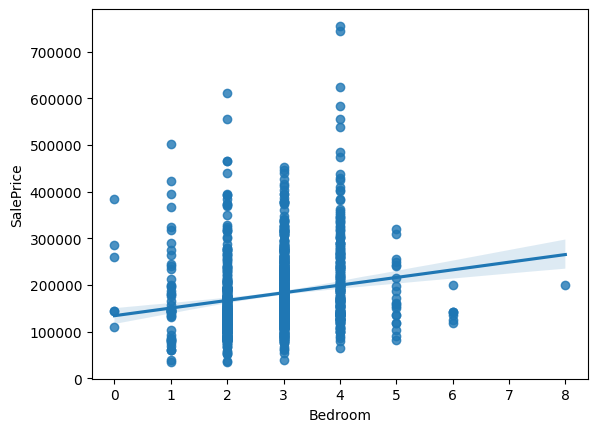

In [84]:
sns.regplot(x = 'Bedroom', y='SalePrice', data=df)

<AxesSubplot:xlabel='Kitchen', ylabel='SalePrice'>

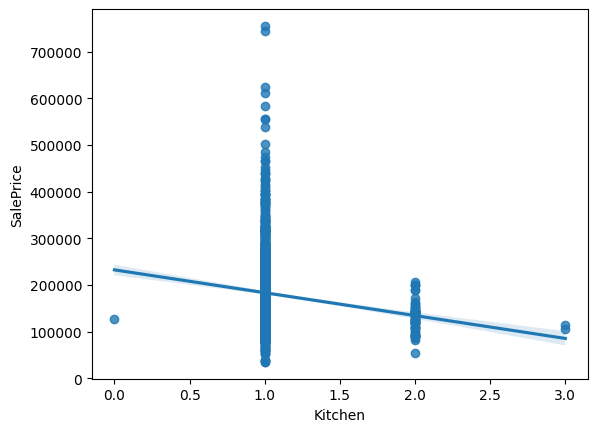

In [85]:
sns.regplot(x= 'Kitchen', y = 'SalePrice', data=df)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

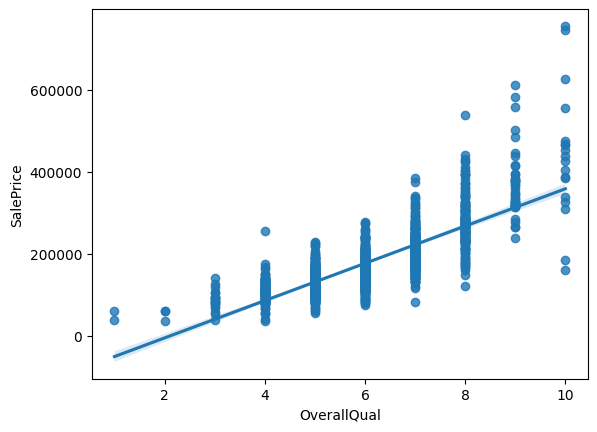

In [86]:
sns.regplot(x='OverallQual', y='SalePrice', data=df)

In [87]:
df[['OverallQual', 'SalePrice']].corr()

,OverallQual,SalePrice
OverallQual,1.000000,0.790982
SalePrice,0.790982,1.000000


<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

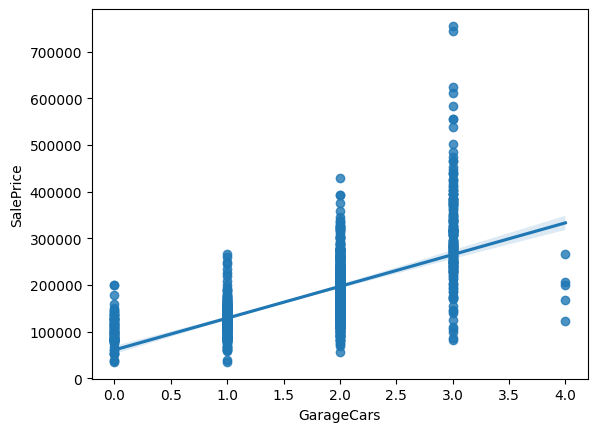

In [88]:
sns.regplot(x='GarageCars', y='SalePrice', data=df)

In [93]:
features = ['OverallQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Kitchen', 'Bedroom', 'OverallCond']
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(df[features], y, test_size=0.25, random_state=0)

<b>Model Development</b>

In [90]:
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print((lr.score(X_test, y_test))*100 , "is model accuracy")

68.01476432216693 is model accuracy


Creating Pipe lines to improve the model

In [95]:
pipeline = [('scaling', StandardScaler()), ('polymonial', PolynomialFeatures()), ('model', LinearRegression())]

pipe = Pipeline(pipeline)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('polymonial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [96]:
print((pipe.score(X_test, y_test))*100, 'is the accuracy score!!')

76.99768141302152 is the accuracy score!!
